# MODULES

In [2]:
import glob 
import spacy
from spacy import displacy
import re
import string
import seaborn
import pandas as pd
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#!python -m spacy download en_core_web_sm
#!python.exe -m pip install --upgrade pip
#!python -m spacy download it_core_news_sm

nlp_it = spacy.load("it_core_news_sm")
nlp_fr = spacy.load("fr_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

# FONCTIONS

In [4]:
def lire_fichier(chemin):
    with open(chemin, encoding ="utf-8") as f:
        chaine = f.read()
    return chaine

def tokenisation(langue):
    tok = []
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    nlp = eval("nlp_"+langue)
    for texte in corpus:
        text = lire_fichier(texte)
        doc = nlp(text)
        tokens = [token.text for token in doc]
        tok.extend(tokens)
    return tok


def lemmatisation(langue):
    dic_lemme = {}
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    nlp = eval("nlp_"+langue)
    for texte in corpus:
        text = lire_fichier(texte)
        doc = nlp(text)
        dic_freq_lemme = {}
        for token in doc:
            lemme = token.lemma_
            if lemme != "\n":
                if lemme not in dic_freq_lemme:
                    dic_freq_lemme[lemme] = 1
                else:
                    dic_freq_lemme[lemme] += 1
    return dic_freq_lemme



def REN(langue): 
    nlp = eval("nlp_"+langue)
    nlp.max_length = 2000000
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    for texte in corpus:
        text = lire_fichier(texte)
        doc = nlp(text)
        displacy.serve(doc, style="ent") #visualise les entités nommées
    
def REN_nettoyer(langue): #Renvoie une liste des mots de vocabulaire (hors les stop words et EN)
    nlp = eval("nlp_"+langue)
    nlp.max_length = 2000000
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    for texte in corpus:
        text = lire_fichier(texte)  
        for ponctuation in string.punctuation:
            text = text.replace(ponctuation,'')
        for i in ["\n", "\t", ","]:
            text =re.sub(i,"", text)
        doc = nlp(text)
        textes_nettoyer = [token.text for token in doc if not token.is_stop and not token.ent_type_]
        #displacy.serve(doc, style="ent")
    return textes_nettoyer


def len_txt(langue): #Renvoie une liste de la longueur de chaque texte brut
    lg = []
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    for texte in corpus:
        text = lire_fichier(texte)  
        for ponctuation in string.punctuation:
            text = text.replace(ponctuation,'')
        for i in ["\n", "\t", ","]:
            text =re.sub(i,"", text)
        lg.append(len(text.split()))
    return lg

In [5]:
"""""
def REN_nettoyer_lg(langue): #Renvoie une liste de la longueur de chaque texte néttoyé 
    lg = []
    nlp = eval("nlp_"+langue)
    nlp.max_length = 2000000
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    for texte in corpus:
        text = lire_fichier(texte)  
        for ponctuation in string.punctuation:
            text = text.replace(ponctuation,'')
        for i in ["\n", "\t", ","]:
            text =re.sub(i,"", text)
        doc = nlp(text)
        textes_nettoyer = [token.text for token in doc if not token.is_stop and not token.ent_type_]
        longueur = len(textes_nettoyer)
        lg.append(longueur)
    return lg
"""""
def REN_nettoyer_lg(langue):
    vocab_txt = []
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    nlp = eval("nlp_"+langue)
    for texte in corpus:
        text = lire_fichier(texte)
        doc = nlp(text)
        dic_freq_lemme = {}
        for token in doc:
            lemme = token.lemma_
            if lemme != "\n":
                if lemme not in dic_freq_lemme:
                    dic_freq_lemme[lemme] = 1
                else:
                    dic_freq_lemme[lemme] += 1
        vocab_txt.append(len(dic_freq_lemme))
    return vocab_txt



def proportion_lemme(langue): 
    nb_lemme_partxt = []
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    nlp = eval("nlp_"+langue)
    for texte in corpus:
        lemmes = 0
        text = lire_fichier(texte)
        doc = nlp(text)
        for token in doc:
            lemma = token.lemma_
            if lemma != '\n':
                lemmes += 1
        nb_lemme_partxt.append(lemmes)#extrait les lemmes de chaque texte et les ajoute dans une liste #compte la longueur de la chaque lemme pour chaque texte #renvoie une liste de la proportion de chaque longueur de lemme par rapport au nombre total de textes
    return nb_lemme_partxt


def proportion_np(langue):
    np_par_lg = 0
    nlp = eval("nlp_"+langue)
    nlp.max_length = 2000000
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    for texte in corpus:
        text = lire_fichier(texte)
        for ponctuation in string.punctuation:
            text = text.replace(ponctuation,'')
        for i in ["\n", "\t", ","]:
            text =re.sub(i,"", text)
        doc = nlp(text)
        for token in doc:
            if token.ent_type_ == "PER" or "LOC":
                np_par_lg += 1
        #for l in tok:
            #longueur = len(l) #Une liste des longueurs des EN de chaque texte pour chaque langue
    #lg = round(np_par_lg/216, 2) #Renvoie une liste de la proportion de chaque longueur des EN par rapport au nombre total de textes
    return np_par_lg

In [6]:
#!python -m spacy validate

# MAIN

## Lemmatisation

In [7]:
langues = ['fr', 'en', 'it']
dic_lemme = {langue:lemmatisation(langue) for langue in langues}
#print(dic_lemme)
for langue in langues:
    print(langue)

fr
en
it


## Tokenisation

In [8]:
Textes_EN = tokenisation("en")
Textes_FR = tokenisation("fr")
Textes_IT = tokenisation("it")

In [9]:
#REN

In [10]:
dic_lang_len = {langue:len_txt(langue) for langue in langues}
print(dic_lang_len) #dic de toutes la longueur des textes brut

{'fr': [504, 704, 1135, 374, 952, 927, 743, 724, 258, 856, 617, 196, 152, 917, 598, 669, 1359, 1499, 1679, 750, 507, 488, 955, 4237, 535, 572, 909, 433, 974, 972, 635, 1030, 1436, 882, 449, 479, 825, 1331, 476, 676, 587, 853, 1064, 879, 597, 567, 497, 437, 489, 802, 576, 768, 828, 663, 913, 709, 756, 568, 531, 800, 705, 896, 753, 853, 828, 1007, 745, 1296, 887, 686, 1281, 467, 460, 861, 741, 885, 845, 227, 928, 883, 1327, 555, 892, 1084, 948, 669, 1370, 860, 901, 1208, 660, 802, 1012, 571, 767, 570, 1014, 518, 900, 1517, 775, 892, 690, 1070, 801, 963, 926, 1049, 909, 811, 714, 1011, 1036, 1086, 873, 842, 714, 983, 738, 838, 1493, 1499, 930, 1366, 889, 558, 1585, 884, 841, 435, 1075, 774, 1056, 1498, 682, 1065, 836, 495, 1010, 1017, 613, 776, 1154, 1014, 686, 495, 725, 1610, 1006, 709, 1708, 705, 1087, 468, 603, 822, 807, 1247, 1023, 1214, 861, 1085, 865, 965, 788, 1042, 1285, 613, 711, 769, 1037, 880, 1044, 1016, 609, 566, 1105, 846, 955, 631, 420, 924, 949, 701, 1078, 1707, 1076, 1128

In [11]:
dic_voc_len = {langue:REN_nettoyer_lg(langue) for langue in langues}
print(dic_voc_len) #dic du nombre de tokens (voc) par textes pour chaque langues

{'fr': [288, 309, 420, 199, 402, 345, 332, 326, 165, 367, 428, 137, 114, 338, 311, 300, 463, 834, 977, 327, 234, 226, 325, 1061, 267, 247, 373, 240, 418, 407, 321, 456, 600, 408, 243, 233, 370, 545, 229, 313, 256, 287, 409, 340, 416, 304, 245, 230, 250, 308, 242, 298, 337, 290, 438, 334, 337, 295, 260, 371, 312, 363, 293, 367, 297, 374, 322, 497, 408, 338, 423, 211, 225, 371, 255, 388, 341, 142, 343, 361, 420, 206, 309, 384, 382, 295, 457, 371, 353, 518, 285, 294, 423, 265, 304, 300, 373, 250, 335, 508, 292, 315, 310, 385, 297, 357, 342, 380, 368, 303, 285, 351, 341, 369, 325, 356, 289, 324, 280, 297, 532, 652, 348, 533, 411, 278, 555, 355, 349, 182, 422, 295, 349, 681, 306, 381, 313, 256, 372, 360, 275, 272, 378, 355, 297, 206, 334, 589, 386, 280, 727, 306, 407, 224, 284, 349, 296, 438, 392, 391, 322, 352, 344, 333, 332, 407, 452, 249, 294, 312, 375, 336, 451, 376, 255, 260, 391, 301, 353, 256, 207, 380, 404, 306, 511, 681, 440, 379, 372, 388, 309, 403, 180, 220, 254, 344, 454, 518, 3

In [12]:
prop_lem_general = {langue: (REN_nettoyer_lg(langue), len_txt(langue)) for langue in langues}

# Utiliser les résultats calculés
prop_lem = {}
for langue in langues:
    prop_lem[langue] = []
    for i in range(len(prop_lem_general[langue][0])):
        prop_lem[langue].append(prop_lem_general[langue][0][i] / prop_lem_general[langue][1][i]*100)
print(prop_lem)

#for i in dic_prop_lemme.values():
    #print(len(i))

{'fr': [57.14285714285714, 43.89204545454545, 37.00440528634361, 53.20855614973262, 42.226890756302524, 37.2168284789644, 44.68371467025572, 45.027624309392266, 63.95348837209303, 42.873831775700936, 69.3679092382496, 69.89795918367348, 75.0, 36.85932388222465, 52.0066889632107, 44.843049327354265, 34.0691685062546, 55.63709139426284, 58.189398451459205, 43.6, 46.15384615384615, 46.31147540983606, 34.031413612565444, 25.04130280859098, 49.90654205607476, 43.18181818181818, 41.03410341034103, 55.42725173210161, 42.91581108829568, 41.8724279835391, 50.55118110236221, 44.271844660194176, 41.78272980501393, 46.25850340136054, 54.12026726057907, 48.643006263048015, 44.84848484848485, 40.94665664913599, 48.109243697478995, 46.30177514792899, 43.61158432708688, 33.64595545134818, 38.43984962406015, 38.68031854379977, 69.68174204355108, 53.61552028218695, 49.29577464788733, 52.63157894736842, 51.124744376278116, 38.403990024937656, 42.01388888888889, 38.80208333333333, 40.70048309178744, 43.74

In [14]:
dic_nom_propre = {langue:proportion_np(langue) for langue in langues}
print(dic_nom_propre) #nombre de noms propres pour chaque langues
dic_np = {}
somme = sum(dic_nom_propre.values())
for cle, val in dic_nom_propre.items():
    proportion_np = round(val/somme, 6)*100
    dic_np[cle] = proportion_np
print(dic_np) #np par langue/np total


{'fr': 205159, 'en': 167236, 'it': 187413}
{'fr': 36.6481, 'en': 29.8738, 'it': 33.4781}


## GRAPHIQUES

- dic_lang_len = Nombre de tokens par texte pour chaque langue

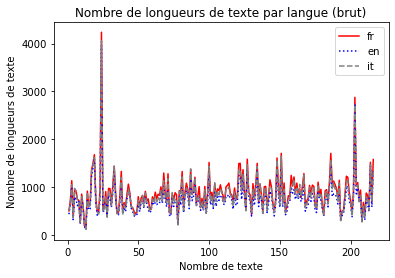

In [15]:
#nombre de tokens des textes bruts
nb_textes = list(range(1, 217))

plt.subplot()
linestyles = ['-', ':', '--']
colors = ['r', 'b', 'grey']

for i, langue in enumerate(langues): #i itère chaque elt grâce à enumerate
    long_textes = dic_lang_len[langue] 
    plt.plot(nb_textes, long_textes, label=langue, color=colors[i], linestyle=linestyles[i])

plt.xlabel('Nombre de texte')
plt.ylabel('Nombre de longueurs de texte')
plt.title('Nombre de longueurs de texte par langue (brut)')

plt.legend()
plt.show()


- dic_voc_len = Le nombre de token type (vocabulaire) par textes pour chaque langue

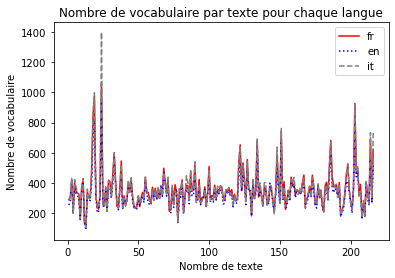

In [16]:
#Nombre vocabulaire néttoyés
nb_textes = list(range(1, 217))

plt.subplot()
linestyles = ['-', ':', '--']
colors = ['r', 'b', 'grey']

for i, langue in enumerate(langues): #i itère chaque elt grâce à enumerate
    long_textes = dic_voc_len[langue] 
    plt.plot(nb_textes, long_textes, label=langue, color=colors[i], linestyle=linestyles[i])

plt.xlabel('Nombre de texte')
plt.ylabel('Nombre de vocabulaire')
plt.title('Nombre de vocabulaire par texte pour chaque langue')

plt.legend()
plt.show()

- prop_lem = La proportion de lemmes par textes pour chaque langue

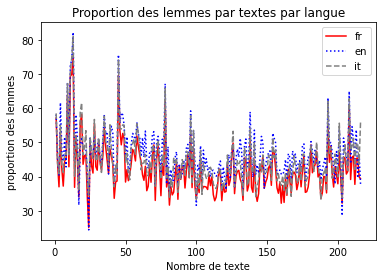

In [17]:
#Proportion de lemmes par textes pour chaque langue
nb_textes = list(range(1, 217))

plt.subplot()
linestyles = ['-', ':', '--']
colors = ['r', 'b', 'grey']

for i, langue in enumerate(langues): #i itère chaque elt grâce à enumerate
    long_textes = prop_lem[langue] 
    plt.plot(nb_textes, long_textes, label=langue, color=colors[i], linestyle=linestyles[i])

plt.xlabel('Nombre de texte')
plt.ylabel('proportion des lemmes')
plt.title('Proportion des lemmes par textes par langue')

plt.legend()
plt.show()

- dic_np = La proportion de noms propres pour chaque langue

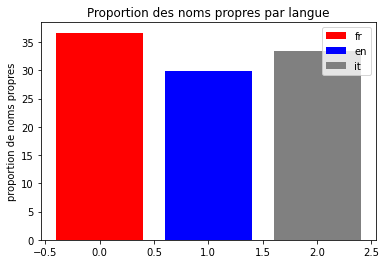

In [18]:
#proportion de noms propres pour chaque langue
nb_langues = list(range(3))

plt.subplot()
linestyles = ['-', ':', '--']
colors = ['r', 'b', 'grey']

for i, langue in enumerate(langues): #i itère chaque elt grâce à enumerate
    proportion_nom_propre = dic_np[langue] 
    plt.bar(i, proportion_nom_propre, label=langue, color=colors[i], linestyle=linestyles[i])

plt.xlabel(' ')
plt.ylabel('proportion de noms propres')
plt.title('Proportion des noms propres par langue')

plt.legend()
plt.show()

# PARTITONNEMENT CLUSTERING 

In [19]:
def generer_ngrams(text, n):
    characters = list(text)
    car_ngrams = list(ngrams(characters, n))
    return car_ngrams

texte = "je suis ici chez moi"

bigrammes = generer_ngrams(texte, 2)
trigrammes = generer_ngrams(texte, 3)
gram4 = generer_ngrams(texte, 4)
gram5 = generer_ngrams(texte, 5)

print(bigrammes)

[('j', 'e'), ('e', ' '), (' ', 's'), ('s', 'u'), ('u', 'i'), ('i', 's'), ('s', ' '), (' ', 'i'), ('i', 'c'), ('c', 'i'), ('i', ' '), (' ', 'c'), ('c', 'h'), ('h', 'e'), ('e', 'z'), ('z', ' '), (' ', 'm'), ('m', 'o'), ('o', 'i')]


In [23]:
"""
def bigram_test(langue):
    corpus_words = []  # Liste pour stocker les mots du corpus
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    for texte in corpus:
        text = lire_fichier(texte)
        corpus_words.extend(text.split())  # Ajoutez les mots du texte à la liste

    bigrams = list(ngrams(corpus_words, 2))  # Générez des bigrammes à partir des mots
    bigram_strings = [' '.join(bigram) for bigram in bigrams]

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(bigram_strings)

    # Perform k-means clustering
    num_clusters = 3  # You can adjust this number as needed
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    print(X)
    print(kmeans)
    print(cluster_labels)
    # Group words based on cluster labels
    clusters = {}
    for i, label in enumerate(cluster_labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(bigram_strings[i])

    # Print clusters
    for cluster, words in clusters.items():
        print(f"Cluster {cluster}:")
        print(words)
        print()
        break

for langue in langues:
    print(bigram_test(langue))
    break
"""

'\ndef bigram_test(langue):\n    corpus_words = []  # Liste pour stocker les mots du corpus\n    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")\n    for texte in corpus:\n        text = lire_fichier(texte)\n        corpus_words.extend(text.split())  # Ajoutez les mots du texte à la liste\n\n    bigrams = list(ngrams(corpus_words, 2))  # Générez des bigrammes à partir des mots\n    bigram_strings = [\' \'.join(bigram) for bigram in bigrams]\n\n    vectorizer = CountVectorizer()\n    X = vectorizer.fit_transform(bigram_strings)\n\n    # Perform k-means clustering\n    num_clusters = 3  # You can adjust this number as needed\n    kmeans = KMeans(n_clusters=num_clusters)\n    kmeans.fit(X)\n\n    # Get cluster labels\n    cluster_labels = kmeans.labels_\n\n    print(X)\n    print(kmeans)\n    print(cluster_labels)\n    # Group words based on cluster labels\n    clusters = {}\n    for i, label in enumerate(cluster_labels):\n        if label not in clusters:\n            clusters[label]

In [24]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import random

def sample_clusters(clusters, sample_size=5):
    sampled_clusters = {}
    for cluster, words in clusters.items():
        if len(words) <= sample_size:
            sampled_clusters[cluster] = words
        else:
            sampled_clusters[cluster] = random.sample(words, sample_size)
    return sampled_clusters

def bigram_test(langue, sample_size=5):
    corpus_words = []  # Liste pour stocker les mots du corpus
    corpus = glob.glob(f"corpus_multi/{langue}/appr/*")
    for texte in corpus:
        text = lire_fichier(texte)
        corpus_words.extend(text.split())  # Ajoutez les mots du texte à la liste

    bigrams = list(ngrams(corpus_words, 2))  # Générez des bigrammes à partir des mots
    bigram_strings = [' '.join(bigram) for bigram in bigrams]

    vectorizer = CountVectorizer(min_df=2, max_df=0.8)
    X = vectorizer.fit_transform(bigram_strings)

    num_clusters = 3
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)

    cluster_labels = kmeans.labels_

    # Group words based on cluster labels
    clusters = {}
    for i, label in enumerate(cluster_labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(bigram_strings[i])

    # Sample clusters
    sampled_clusters = sample_clusters(clusters, sample_size)

    return sampled_clusters
        
dic_clusters = {}
for langue in langues:
    dic_clusters[langue] = bigram_test(langue)
print(dic_clusters)


{'fr': {0: ['weaknesses of', 'et au', '1,1 1,1%', "l'enseignement supérieur,", 'un échec'], 1: ['la suffocation', 'pour la', 'est la', 'et la', 'société. La'], 2: ['entre de', 'ludique de', 'de lutte', 'de 755', 'de plus']}, 'en': {0: ['information on', 'High Level', 'of cases', 'is holding', 'national enforcement'], 1: ['and the', 'and the', 'the sea.', 'the surplus', 'curriculum. The'], 2: ['in business', 'inequalities in', 'in shell,', 'in the', 'available in']}, 'it': {0: ['le tariffe', 'The partners', "dall'allargamento. Le", 'riducendo gli', '4 miliardi'], 2: ['43.699.1966579. La', 'la loro', 'gli sforzi!La', 'dicembre. La', 'la decisione'], 1: ['di dominio', 'Aiuti di', 'strumenti di', 'scarsità di', 'meno, di']}}


In [25]:
def partition_data(langue, train_ratio=0.8):
    corpus_files = glob.glob(f"corpus_multi/{langue}/appr/*")
    random.shuffle(corpus_files)  # Mélanger aléatoirement les fichiers

    # Séparation des données en ensembles d'apprentissage et de test
    num_train = int(len(corpus_files) * train_ratio)
    train_files = corpus_files[:num_train]
    test_files = corpus_files[num_train:]

    # Lecture des fichiers d'apprentissage et de test
    X_train = [lire_fichier(file) for file in train_files]
    y_train = [langue] * len(X_train)
    X_test = [lire_fichier(file) for file in test_files]
    y_test = [langue] * len(X_test)

    return X_train, X_test, y_train, y_test


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_ngrams(X_train):
    vectorizer = CountVectorizer(ngram_range=(2, 3), analyzer='char')
    X_train_ngrams = vectorizer.fit_transform(X_train)
    return X_train_ngrams, vectorizer

In [27]:
from sklearn.manifold import TSNE

def visualize_clusters(X, y, langue):
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='y', cmap='viridis')
    plt.colorbar(label=langue)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Visualisation des clusters de bigrammes/trigrammes')
    plt.show()

## Visualisation des clusters 

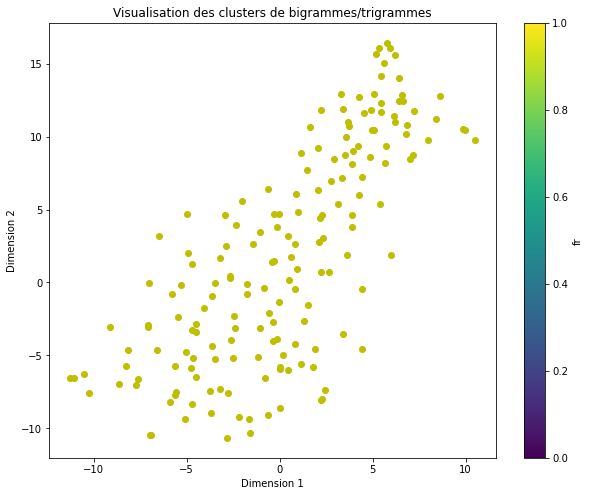

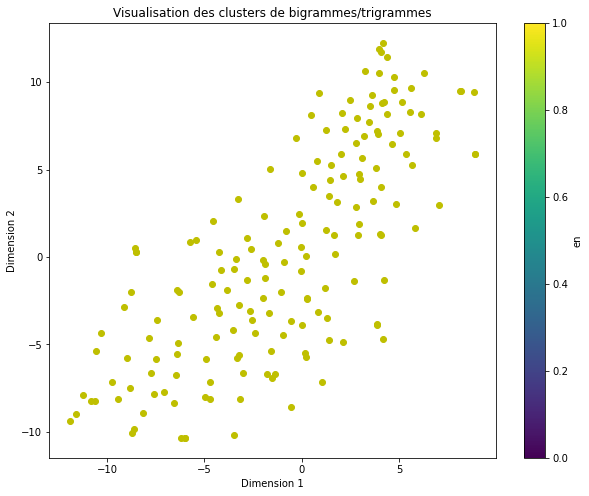

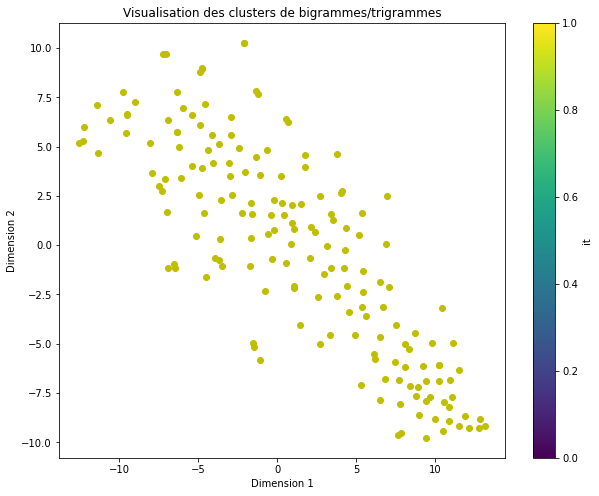

In [28]:
for langue in langues:
    X_train, X_test, y_train, y_test = partition_data(langue)
    X_train_ngrams, vectorizer = extract_ngrams(X_train)
    print()
    visualize_clusters(X_train_ngrams, y_train, langue)